# Import important libraries


In [86]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt


# Reading URL

In [87]:
data_obj = urlopen("https://www.flipkart.com/laptops/pr?sid=6bo,b5g&otracker=categorytree&fm=neo%2Fmerchandising&iid=M_ae4b3e18-96d8-4a83-8b6b-71633deda3df_1_372UD5BXDFYS_MC.34WHNYFH5V2Y&otracker=hp_rich_navigation_8_1.navigationCard.RICH_NAVIGATION_Electronics~Laptop%2Band%2BDesktop_34WHNYFH5V2Y&otracker1=hp_rich_navigation_PINNED_neo%2Fmerchandising_NA_NAV_EXPANDABLE_navigationCard_cc_8_L1_view-all&cid=34WHNYFH5V2Y")

In [88]:
web_data = data_obj.read()
print(web_data)

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.d4bb4f.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [89]:
soup_data = soup(web_data)


# To link all the data stored in different pages

In [90]:
pages_link = soup_data.findAll('a',{'class': 'ge-49M'})
domain = 'https://www.flipkart.com/laptops/pr?sid=6bo%2Cb5g&otracker=categorytree&fm=neo%2Fmerchandising&iid=M_ae4b3e18-96d8-4a83-8b6b-71633deda3df_1_372UD5BXDFYS_MC.34WHNYFH5V2Y&otracker=hp_rich_navigation_8_1.navigationCard.RICH_NAVIGATION_Electronics~Laptop%2Band%2BDesktop_34WHNYFH5V2Y&otracker1=hp_rich_navigation_PINNED_neo%2Fmerchandising_NA_NAV_EXPANDABLE_navigationCard_cc_8_L1_view-all&cid=34WHNYFH5V2Y&page='

for i in range(1,41):
  link = (domain + str(i))
  page_data = urlopen(link)
  web_data1 = page_data.read()
  web_data += web_data1




In [91]:
soupdata = soup(web_data , 'html.parser')
type(soupdata)

bs4.BeautifulSoup

In [92]:
containers = soupdata.findAll('div', {'class':'_2kHMtA'})


# Type and Length of Container

In [93]:
print(type(containers), len(containers))

<class 'bs4.element.ResultSet'> 984


# Indexing of Container

In [94]:
containers[0]

<div class="_2kHMtA"><a class="_1fQZEK" href="/hp-laptop-core-i3-11th-gen-1115g4-8-gb-512-gb-ssd-windows-11-home-15s-fq2717tu-thin-light/p/itm3a1a5c67dcd24?pid=COMGHAGNPKH4AR8V&amp;lid=LSTCOMGHAGNPKH4AR8VGHOYNG&amp;marketplace=FLIPKART&amp;store=6bo%2Fb5g&amp;srno=b_1_1&amp;otracker=browse&amp;otracker1=hp_rich_navigation_PINNED_neo%2Fmerchandising_NA_NAV_EXPANDABLE_navigationCard_cc_8_L1_view-all&amp;fm=organic&amp;iid=f51df139-5210-4751-8e6c-641fefac8204.COMGHAGNPKH4AR8V.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=ys8vzsj3w00000001694351625002" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP Laptop Core i3 11th Gen 1115G4 - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq2717TU Thin and Light Lapt..." class="_396cs4" loading="eager" src="https://rukminim2.flixcart.com/image/312/312/xif0q/computer/c/l/u/-original-imagp7pgcy8e6eta.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class

In [95]:
f=open('laptops_info.csv','wb')
f.write('Prod_Name,Stars,Ratings,Reviews,Current_MRP,MRP,Processor,Ram,Storage,Image_url\n'.encode())

for i in containers:
  # Finding Prtoduct Name
  product = i.find('div', {'class': '_4rR01T'})
  Prod_Name = product.text.split('-')[0].strip()

  # Finding Stars
  star = i.find('div', {'class': '_3LWZlK'})
  try:
    Stars = star.text
  except:
    Stars= 0

  # finding Rating & Reviews using regex Command
  rating = i.find('span', {'class': '_2_R_DZ'})
  try:
    rat_rev = re.findall('\d+,?\d*',rating.text)
    Ratings = rat_rev[0].replace(',','')
    Reviews = rat_rev[1].replace(',','')
  except:
    Ratings=0
    Reviews=0


  # Finding Actual and Current Price
  current_price = i.find('div', {'class': '_30jeq3 _1_WHN1'})
  try:
    Current_MRP = current_price.text.replace(',','').replace('₹','')
  except:
    Current_MRP = 0

  actual_price = i.find('div', {'class': '_3I9_wc _27UcVY'})
  try:
    MRP = actual_price.text.replace(',','').replace('₹','')
  except:
    MRP = 0

  # Finding Product Information
  prod_info=i.findAll('li', {'class': 'rgWa7D'})
  Processor = prod_info[0].text
  Ram = prod_info[1].text
  Storage = prod_info[3].text

  # Finding Product Image
  image = i.img
  Image_url = image.get('src')
  print(Prod_Name,Stars,Ratings,Reviews,Current_MRP,MRP,Processor,Ram,Storage,Image_url, end='\n')
  f.write(f"{Prod_Name},{Stars},{Ratings},{Reviews},{Current_MRP},{MRP},{Processor},{Ram},{Storage},{Image_url}\n".encode())
f.close()




HP Laptop Core i3 11th Gen 1115G4 4.2 420 32 38990 49025 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/c/l/u/-original-imagp7pgcy8e6eta.jpeg?q=70
ASUS Vivobook 15 Core i3 11th Gen 1115G4 4.3 5087 458 37990 49990 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/q/e/z/-original-imagpxgqesgrthks.jpeg?q=70
Infinix INBook Y1 Plus Intel Core i3 10th Gen 1005G1 4.1 1903 249 26990 49990 Intel Core i3 Processor (10th Gen) 8 GB LPDDR4X RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/u/u/k/-original-imagmxuravjcmdwu.jpeg?q=70
Lenovo V15 Ryzen 5 Hexa Core 5500U 4.2 601 74 34990 69525 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/b/d/i/-original-imagzhefhc84rmbf.jpeg?q=70
ASUS Vivobook Go 15 Celeron Dual Core N4020 4.1 384 42 27990 36990 Intel Celeron Dual Cor

# Save csv File to DataFrame

In [96]:
df = pd.read_csv('laptops_info.csv', error_bad_lines= False)
df


<ipython-input-96-351aa0e61052>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('laptops_info.csv', error_bad_lines= False)
Skipping line 14: expected 10 fields, saw 14
Skipping line 36: expected 10 fields, saw 14
Skipping line 58: expected 10 fields, saw 11
Skipping line 199: expected 10 fields, saw 19
Skipping line 238: expected 10 fields, saw 11
Skipping line 356: expected 10 fields, saw 11
Skipping line 374: expected 10 fields, saw 11
Skipping line 607: expected 10 fields, saw 11
Skipping line 613: expected 10 fields, saw 11
Skipping line 634: expected 10 fields, saw 11
Skipping line 637: expected 10 fields, saw 15
Skipping line 678: expected 10 fields, saw 15
Skipping line 703: expected 10 fields, saw 12
Skipping line 719: expected 10 fields, saw 14
Skipping line 747: expected 10 fields, saw 12
Skipping line 756: expected 10 fields, saw 14
Skipping line 798: expected 10

,Prod_Name,Stars,Ratings,Reviews,Current_MRP,MRP,Processor,Ram,Storage,Image_url
0,HP Laptop Core i3 11th Gen 1115G4,4.2,420,32,38990,49025,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
1,ASUS Vivobook 15 Core i3 11th Gen 1115G4,4.3,5087,458,37990,49990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
2,Infinix INBook Y1 Plus Intel Core i3 10th Gen ...,4.1,1903,249,26990,49990,Intel Core i3 Processor (10th Gen),8 GB LPDDR4X RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
3,Lenovo V15 Ryzen 5 Hexa Core 5500U,4.2,601,74,34990,69525,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
4,ASUS Vivobook Go 15 Celeron Dual Core N4020,4.1,384,42,27990,36990,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...,...
956,APPLE 2021 Macbook Pro M1 Pro,4.8,134,14,182990,194900,Apple M1 Pro Processor,16 GB Unified Memory RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...
957,DELL Alienware Ryzen 7 Hexa Core 6800H,0,0,0,186990,213990,AMD Ryzen 7 Hexa Core Processor,16 GB DDR5 RAM,1 TB HDD|1 TB SSD,https://rukminim2.flixcart.com/image/312/312/x...
958,APPLE MacBook Pro Core i9 8th Gen,4.2,18,0,207040,239900,Intel Core i9 Processor (8th Gen),16 GB DDR3 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/j...
959,RedmiBook Pro Core i5 11th Gen,4.1,6342,703,37990,59999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...


# Check null Values

In [97]:
df.isna().sum()

Prod_Name      0
Stars          2
Ratings        3
Reviews        3
Current_MRP    3
MRP            4
Processor      6
Ram            7
Storage        7
Image_url      7
dtype: int64

In [98]:
# Checking Missing Values
check_null = df.isna().sum().sort_values(ascending=False)
percentage = ((df.isna().sum()/len(df)*100)).sort_values(ascending=False)
df_na_percentage = pd.concat([check_null, percentage], axis=1 ,keys=['Count','Percentage'])
print('Count and percentage of missing values:')
df_na_percentage

Count and percentage of missing values:


,Count,Percentage
Ram,7,0.728408
Storage,7,0.728408
Image_url,7,0.728408
Processor,6,0.624350
MRP,4,0.416233
Ratings,3,0.312175
Reviews,3,0.312175
Current_MRP,3,0.312175
Stars,2,0.208117
Prod_Name,0,0.000000


In [99]:
numeric_vars= ['Stars','Current_MRP','Reviews','Ratings','MRP']


In [100]:
for i in numeric_vars:
  df[i]=pd.to_numeric(df[i], errors='coerce')

df.dtypes

Prod_Name       object
Stars          float64
Ratings        float64
Reviews        float64
Current_MRP    float64
MRP            float64
Processor       object
Ram             object
Storage         object
Image_url       object
dtype: object

In [101]:
for i in numeric_vars:
  df[i]=df[i].fillna(df[i].median())

In [102]:
# Checking Missing Values After Treatment
check_null = df.isna().sum().sort_values(ascending=False)
percentage = ((df.isna().sum()/len(df)*100)).sort_values(ascending=False)
df_na_percentage = pd.concat([check_null, percentage], axis=1 ,keys=['Count','Percentage'])
print('Count and percentage of missing values:')
df_na_percentage

Count and percentage of missing values:


,Count,Percentage
Ram,7,0.728408
Storage,7,0.728408
Image_url,7,0.728408
Processor,6,0.624350
Prod_Name,0,0.000000
Stars,0,0.000000
Ratings,0,0.000000
Reviews,0,0.000000
Current_MRP,0,0.000000
MRP,0,0.000000


#

In [103]:
df.isna().sum()

Prod_Name      0
Stars          0
Ratings        0
Reviews        0
Current_MRP    0
MRP            0
Processor      6
Ram            7
Storage        7
Image_url      7
dtype: int64

In [104]:
df.shape

(961, 10)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Prod_Name    961 non-null    object 
 1   Stars        961 non-null    float64
 2   Ratings      961 non-null    float64
 3   Reviews      961 non-null    float64
 4   Current_MRP  961 non-null    float64
 5   MRP          961 non-null    float64
 6   Processor    955 non-null    object 
 7   Ram          954 non-null    object 
 8   Storage      954 non-null    object 
 9   Image_url    954 non-null    object 
dtypes: float64(5), object(5)
memory usage: 75.2+ KB


# Top 5 Products having highest Ratings

In [106]:
top5_Ratings = df.sort_values(by='Ratings', ascending= False).head()
top5_Ratings

,Prod_Name,Stars,Ratings,Reviews,Current_MRP,MRP,Processor,Ram,Storage,Image_url
364,ASUS VivoBook 15 (2022) Core i3 10th Gen 1005G1,4.3,12219.0,1170.0,35500.0,50990.0,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
744,APPLE MacBook Air M1,4.7,11565.0,995.0,109990.0,110900.0,Apple M1 Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...
795,APPLE MacBook Air M1,4.7,11565.0,995.0,109990.0,110900.0,Apple M1 Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...
7,APPLE 2020 Macbook Air M1,4.7,11565.0,995.0,81990.0,99900.0,Apple M1 Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...
26,APPLE 2020 Macbook Air M1,4.7,11565.0,995.0,81990.0,99900.0,Apple M1 Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...


# Top 5 Products having highest Stars

In [107]:
top5_stars=df.sort_values(by='Stars', ascending= False).head()
top5_stars

,Prod_Name,Stars,Ratings,Reviews,Current_MRP,MRP,Processor,Ram,Storage,Image_url
845,MSI Raider Core i7 8th Gen 8750H,5.0,3.0,2.0,194990.0,0.0,NVIDIA GeForce RTX 2070,Intel Core i7 Processor (8th Gen),64 bit Windows 10 Operating System,https://rukminim2.flixcart.com/image/312/312/j...
778,ASUS ROG Strix Scar 17 Ryzen 9 Octa Core 5900HX,5.0,5.0,3.0,234990.0,332990.0,AMD Ryzen 9 Octa Core Processor,32 GB DDR4 RAM,1 TB SSD,https://rukminim2.flixcart.com/image/312/312/k...
911,MSI Core i7 12th Gen 12700H,5.0,4.0,0.0,179990.0,190990.0,Intel Core i7 Processor (12th Gen),16 GB DDR4 RAM,1 TB SSD,https://rukminim2.flixcart.com/image/312/312/k...
533,DELL Inspiron Ryzen 7 Octa Core 5825U,5.0,3.0,1.0,73890.0,93766.0,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/l...
74,MSI Core i5 11th Gen 11260H,5.0,3.0,0.0,55990.0,83990.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...


# Top 5 Lowest Price Laptops


In [108]:
df.sort_values(by='Current_MRP', ascending= True).head()

,Prod_Name,Stars,Ratings,Reviews,Current_MRP,MRP,Processor,Ram,Storage,Image_url
883,ASUS Chromebook Celeron Dual Core N4020,3.6,12.0,5.0,12990.0,24990.0,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 Inch) Display,https://rukminim2.flixcart.com/image/312/312/k...
229,ASUS Chromebook Flip Touch Celeron Dual Core N...,4.0,3185.0,432.0,16990.0,31990.0,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim2.flixcart.com/image/312/312/x...
438,ASUS Chromebook Celeron Dual Core N3350,3.7,2037.0,271.0,16990.0,25990.0,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,39.62 cm (15.6 inch) Display,https://rukminim2.flixcart.com/image/312/312/k...
419,Lenovo Slim 3 Chromebook Touch Intel Celeron D...,3.8,322.0,32.0,18990.0,37690.0,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,35.56 cm (14 inch) Touchscreen Display,https://rukminim2.flixcart.com/image/312/312/x...
361,Lenovo Athlon Dual Core,3.8,246.0,19.0,19940.0,38000.0,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,256 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...


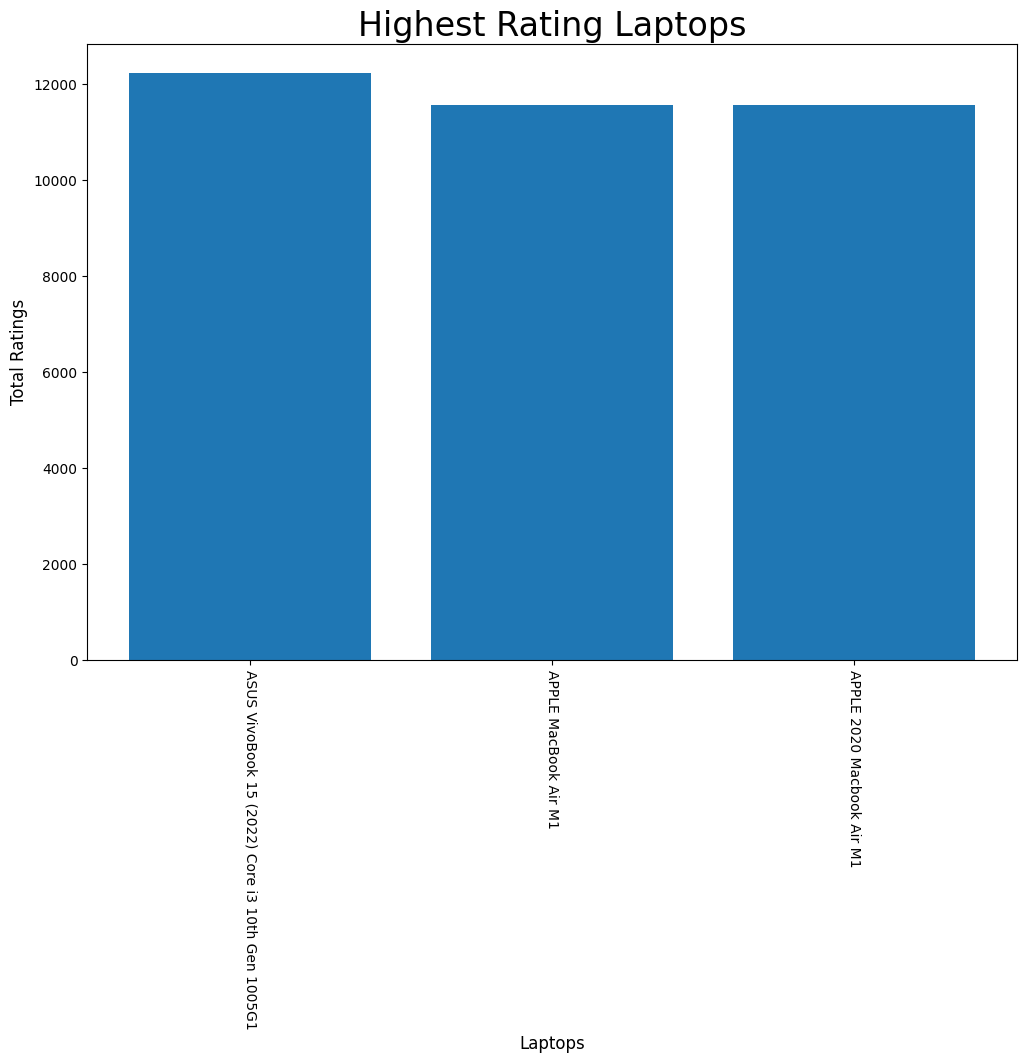

In [109]:
plt.figure(figsize=(12,8))
plt.bar(x=top5_Ratings['Prod_Name'],height=top5_Ratings['Ratings'])
plt.title('Highest Rating Laptops',fontsize=24)
plt.xlabel('Laptops',fontsize=12)
plt.ylabel('Total Ratings',fontsize=12)
plt.xticks(rotation=270)
plt.show()

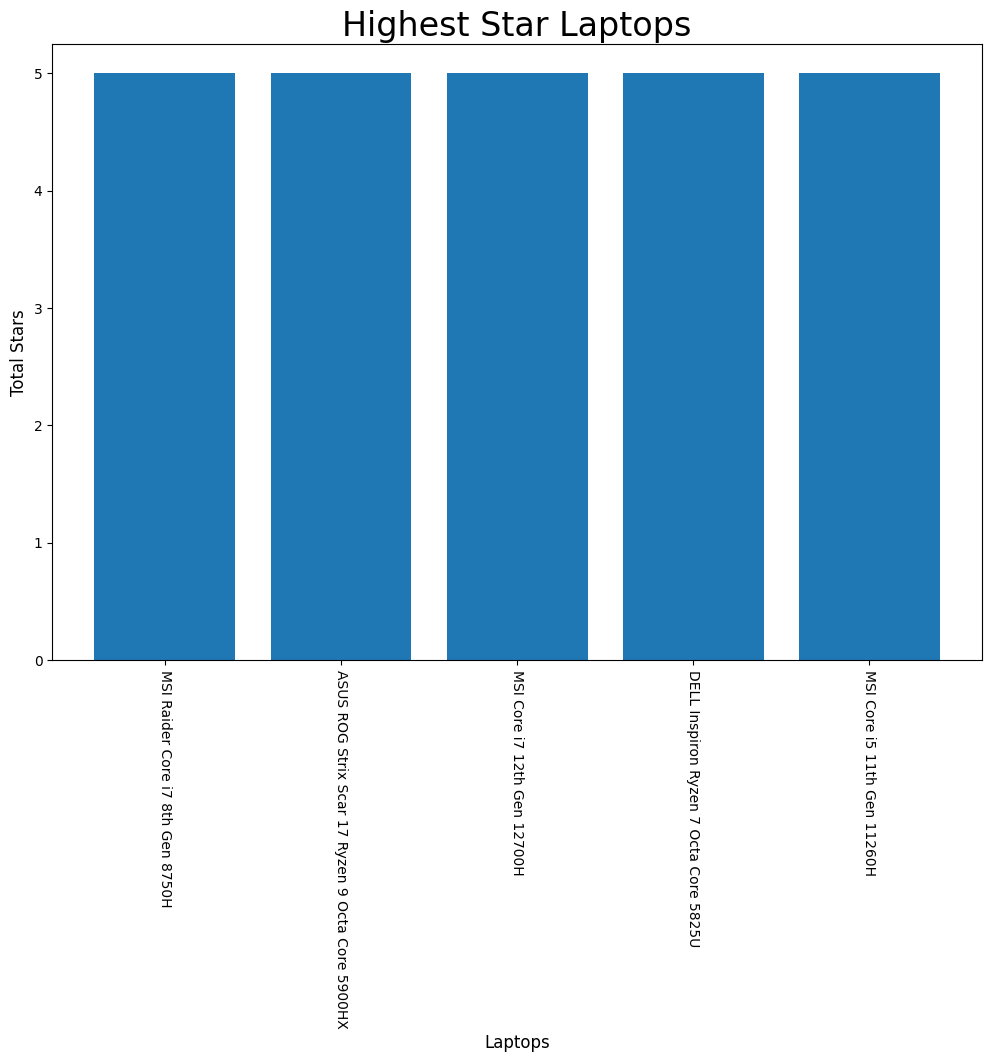

In [110]:
plt.figure(figsize=(12,8))
plt.bar(x=top5_stars['Prod_Name'],height=top5_stars['Stars'])
plt.title('Highest Star Laptops',fontsize=24)
plt.xlabel('Laptops',fontsize=12)
plt.ylabel('Total Stars',fontsize=12)
plt.xticks(rotation=270)
plt.show()

# Laptops Under 50k Price(Budget Laptops)


In [111]:
Budget_laptops = df[df['Current_MRP']<=50000]
Budget_laptops

,Prod_Name,Stars,Ratings,Reviews,Current_MRP,MRP,Processor,Ram,Storage,Image_url
0,HP Laptop Core i3 11th Gen 1115G4,4.2,420.0,32.0,38990.0,49025.0,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
1,ASUS Vivobook 15 Core i3 11th Gen 1115G4,4.3,5087.0,458.0,37990.0,49990.0,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
2,Infinix INBook Y1 Plus Intel Core i3 10th Gen ...,4.1,1903.0,249.0,26990.0,49990.0,Intel Core i3 Processor (10th Gen),8 GB LPDDR4X RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
3,Lenovo V15 Ryzen 5 Hexa Core 5500U,4.2,601.0,74.0,34990.0,69525.0,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
4,ASUS Vivobook Go 15 Celeron Dual Core N4020,4.1,384.0,42.0,27990.0,36990.0,Intel Celeron Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
...,...,...,...,...,...,...,...,...,...,...
939,Acer Core i5 11th Gen,0.0,0.0,0.0,41500.0,58000.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
942,DELL Inspiron Ryzen 3 Dual Core 3250U,4.0,26.0,2.0,40990.0,56771.0,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...
949,Lenovo IdeaPad 3 Intel Core i3 11th Gen 1115G4,3.7,129.0,16.0,35990.0,57990.0,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...
955,DELL Inspiron Core i3 11th Gen 1125G4,4.3,450.0,48.0,47990.0,69695.0,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...


# What kind of laptop configuration You want?

* Input by User (RAM, Processor, Storage)


In [116]:
ram = input("Ram : ")
processor = input("Processor : ")
storage = input("Storage : ")


Ram : 8 GB DDR4 RAM
Processor : Intel Core i5 Processor (11th Gen)
Storage : 512 GB SSD


In [117]:
df[(df.Ram== ram) & (df.Processor== processor) & (df.Storage== storage)]

,Prod_Name,Stars,Ratings,Reviews,Current_MRP,MRP,Processor,Ram,Storage,Image_url
8,ASUS Vivobook 15 Core i5 11th Gen 1135G7,4.3,3149.0,243.0,47990.0,69990.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
21,MSI Core i5 11th Gen 11260H,4.0,11.0,1.0,48990.0,67990.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
27,ASUS Vivobook 15 Core i5 11th Gen 1135G7,4.3,3149.0,243.0,47990.0,69990.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
43,MSI Core i5 11th Gen 11260H,4.0,11.0,1.0,48990.0,67990.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
49,ASUS TUF Gaming F15,4.3,224.0,37.0,57990.0,77990.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
74,MSI Core i5 11th Gen 11260H,5.0,3.0,0.0,55990.0,83990.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...
90,HP Intel Core i5 11th Gen 1155G7,4.3,1822.0,133.0,52490.0,56903.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
100,MSI Core i5 11th Gen 11400H,4.3,550.0,42.0,54990.0,83990.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/l...
125,Lenovo IdeaPad 3 Intel Core i5 11th Gen 1135G7,4.2,1257.0,99.0,44990.0,64290.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
155,Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen...,4.3,3915.0,338.0,53990.0,70790.0,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/k...
